In [11]:
#logistic regression
import pandas as pd
X_train=pd.read_csv('X_train1_scaled.csv')
X_val=pd.read_csv('X_val_scaled.csv')
X_test=pd.read_csv('X_test_scaled.csv')
y_test=pd.read_csv('y_test.csv')
y_train=pd.read_csv('y_train_ml_stat.csv')
y_val=pd.read_csv('y_val.csv')

In [12]:
import statsmodels.formula.api as smf

In [13]:
train_data = pd.concat([X_train, y_train], axis=1)


val_data = pd.concat([X_val, y_val], axis=1)


test_data = pd.concat([X_test, y_test], axis=1)

In [14]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001,0.01,0.1, 1, 10]}

# Create the Logistic Regression model
logistic_reg = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train.values.ravel())

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)




Best hyperparameters: {'C': 0.1}


In [15]:
logistic_reg = LogisticRegression(C=0.1)

# Fit the model to the training data
logistic_reg.fit(X_train, y_train)

# Predict on the validation set
y_pred_logistic = logistic_reg.predict(X_val)

# Evaluate the model
accuracy = logistic_reg.score(X_val, y_val)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.7480035492457853


C:\Users\HP\anaconda3\envs\Work\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
y_pred_logistic_test = logistic_reg.predict(X_train)
logistic_reg.score(X_train, y_train)

0.7637048192771084

In [17]:
logistic_reg.score(X_test, y_test)

0.7430801987224982

In [18]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred_logistic)

array([[628, 217],
       [ 67, 215]], dtype=int64)

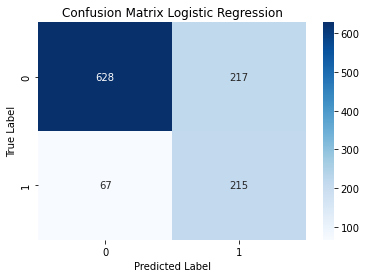

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = [[628, 217],
       [ 67, 215]]

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Customize the plot
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.savefig('cm_lr.png')
plt.show()

In [20]:
#f1 score
from sklearn.metrics import f1_score
print(f1_score(y_val, y_pred_logistic,average=None))

[0.81558442 0.6022409 ]


In [21]:
#roc
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred_logistic)

0.75280330689496

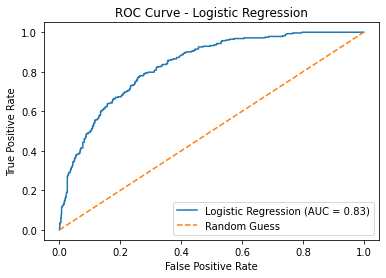

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already trained your logistic regression model and stored it in the variable 'logistic_reg'

# Predict probabilities for the positive class (class 1)
y_prob = logistic_reg.predict_proba(X_val)[:, 1]

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds using the roc_curve function
fpr, tpr, thresholds = roc_curve(y_val, y_prob)

# Calculate the AUC score
auc_score = roc_auc_score(y_val, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.savefig('roc_logistic.png')
plt.show()



In [23]:
logistic_reg.coef_

array([[ 0.46631993,  1.5775678 ,  0.23662463,  0.34933867,  0.27505231,
         0.53255745,  0.68151494, -0.0429408 ,  1.26479359,  0.36652011,
        -0.09753022]])

In [24]:
X_train

,Payment_Method_Electronic_check,Contract_Month_to_month,Streaming_TV_Yes,Tech_Support_No,Online_Backup_No,Online_Security_No,Internet_Service_Fiber_optic,Multiple_Lines_Yes,Dependents_No,Paperless_Billing_Yes,Monthly_Charges
0,1,1,1,1,1,1,1,0,1,1,0.946231
1,0,1,0,0,1,1,1,1,1,1,0.479980
2,1,1,1,1,0,1,1,0,1,1,0.635950
3,0,0,1,0,0,0,1,1,1,1,1.634823
4,0,0,1,0,0,0,0,0,1,1,-0.032730
...,...,...,...,...,...,...,...,...,...,...,...
6635,1,1,1,1,0,1,1,1,1,1,1.004305
6636,1,0,1,0,1,1,1,1,1,1,1.336156
6637,1,1,0,1,1,1,0,0,1,1,-0.971869
6638,0,1,1,1,0,0,0,0,1,1,-0.192019


In [25]:
X_train_interaction = X_train.copy()

# Add the interaction term
X_train_interaction['Interaction_Term'] = X_train_interaction['Internet_Service_Fiber_optic'] * X_train_interaction['Online_Security_No']


In [26]:
logistic_reg_int = LogisticRegression(C=1)
logistic_reg_int.fit(X_train_interaction, y_train)


C:\Users\HP\anaconda3\envs\Work\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1)

In [27]:
interaction_coef = logistic_reg_int.coef_[0][-1]
print("Coefficient of the Interaction Term:", interaction_coef)


Coefficient of the Interaction Term: -0.00022959232303739212


In [28]:
#coefficients including interaction term
logistic_reg_int.coef_

array([[ 4.65891591e-01,  1.64876844e+00,  2.86654104e-01,
         3.36521792e-01,  2.70564258e-01,  5.35453531e-01,
         7.52634476e-01, -3.10835833e-02,  1.36353577e+00,
         3.75993177e-01, -1.45155187e-01, -2.29592323e-04]])

In [29]:
logistic_reg_int.intercept_

array([-3.88678449])

In [72]:
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

poisson_reg = RLM(train_data[['Churn_Value']], train_data[['Payment_Method_Electronic_check', 'Streaming_TV_Yes', 'Tech_Support_No', 'Online_Backup_No', 'Internet_Service_Fiber_optic', 'Multiple_Lines_Yes', 'Dependents_No', 'Contract_Month_to_month', 'Online_Backup_No', 'Paperless_Billing_Yes', 'Monthly_Charges']], family=sm.families.Poisson()).fit()

# Print the summary of the model
print(poisson_reg.summary())

C:\Users\HP\anaconda3\envs\Work\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


                    Robust linear Model Regression Results                    
Dep. Variable:            Churn_Value   No. Observations:                 6640
Model:                            RLM   Df Residuals:                     6630
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 08 May 2023                                         
Time:                        03:18:43                                         
No. Iterations:                    50                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Payment_Me